Exercise 1

In [1]:
! python -m pip install "qiskit-experiments[extras]"
! pip install pylatexenc


# Exercise 1

[1.00e-06 3.10e-05 6.10e-05 9.10e-05 1.21e-04 1.51e-04]


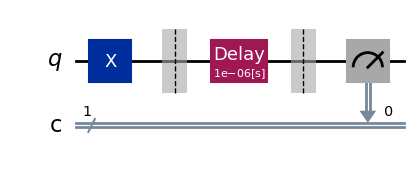

In [2]:
from qiskit_experiments.library import T1
from qiskit_ibm_runtime.fake_provider import FakePerth
from qiskit_aer import AerSimulator
import numpy as np

backend = AerSimulator.from_backend(FakePerth())

qubit0_t1 = FakePerth().qubit_properties(0).t1
delays = np.arange(1e-6, 3 * qubit0_t1, 3e-5)

exp = T1(physical_qubits=(0,), delays=delays)

print(delays)
exp.circuits()[0].draw(output="mpl", style="iqp")

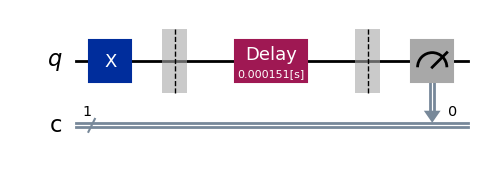

In [3]:
exp.circuits()[-1].draw(output="mpl", style="iqp")

JobStatus.DONE
AnalysisStatus.DONE


/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


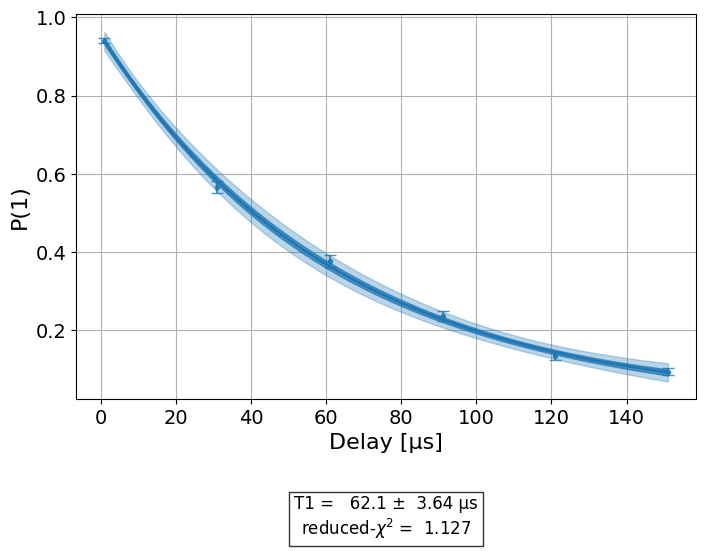

In [4]:
exp_data = exp.run(backend=backend).block_for_results()
print(exp_data.job_status())
print(exp_data.analysis_status())

display(exp_data.figure(0))

In [5]:
exp_data.analysis_results(dataframe=True)

,name,experiment,components,value,quality,backend,run_time,chisq,unit
df0c048c,@Parameters_T1Analysis,T1,[Q0],CurveFitResult:\n - fitting method: least_squa...,good,aer_simulator_from(fake_perth),None,None,None
99c3d4bb,T1,T1,[Q0],(6.2+/-0.4)e-05,good,aer_simulator_from(fake_perth),None,1.127303,s


In [6]:
print(exp_data.analysis_results("T1").value.nominal_value)
print(exp_data.analysis_results("T1").value.std_dev)

6.212630662727776e-05
3.6359186179717305e-06


In [7]:
print(exp_data.artifacts("fit_summary").data)

CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_exp_decay(x) = amp * exp(-x/tau) + base
 - success: True
 - number of function evals: 20
 - degree of freedom: 3
 - chi-square: 3.3819098196473125
 - reduced chi-square: 1.1273032732157708
 - Akaike info crit.: 2.5600866965585474
 - Bayesian info crit.: 1.9353651042427127
 - init params:
  * amp = 0.8458536585365853
  * tau = 6.47090687914954e-05
  * base = 0.0951219512195122
 - fit params:
  * amp = 0.9449680847356168 ± 0.01906611041901211
  * tau = 6.212630662727776e-05 ± 3.6359186179717305e-06
  * base = 0.009805308847925766 ± 0.019151215460410445
 - correlations:
  * (tau, base) = -0.930984838502904
  * (amp, base) = -0.902716432031315
  * (amp, tau) = 0.7817714227049237


In [8]:
print(exp_data.data(0))

{'job_id': '9c2684e2-06f6-4451-9784-aa128a4a80b2', 'meas_level': 2, 'meas_return': 'single', 'counts': {'1': 964, '0': 60}, 'memory': ['1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', 

In [9]:
print(exp_data.metadata)

{'physical_qubits': [0], 'device_components': [<Qubit(Q0)>], 'meas_level': <MeasLevel.CLASSIFIED: 2>, '_source': {'class': 'qiskit_experiments.framework.experiment_data.ExperimentData', 'metadata_version': 1, 'qiskit_version': {'qiskit': '1.2.4', 'qiskit-experiments': '0.8.0'}}}


Shots set to 1000, measurement level set to {exp.run_options.get('meas_level')}
Transpile options are Options(optimization_level=3, scheduling_method='asap', basis_gates=['x', 'sx', 'rz'])
Experiment options are Options(max_circuits=None, delays=array([1.00e-06, 5.10e-05, 1.01e-04, 1.51e-04, 2.01e-04, 2.51e-04,
       3.01e-04, 3.51e-04, 4.01e-04, 4.51e-04, 5.01e-04, 5.51e-04]))


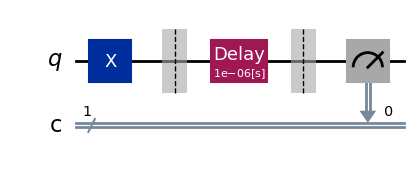

In [10]:
from qiskit.qobj.utils import MeasLevel

exp.set_run_options(shots=1000,
                    meas_level=MeasLevel.CLASSIFIED)
print(f"Shots set to {exp.run_options.get('shots')}, "
      "measurement level set to {exp.run_options.get('meas_level')}")

exp.set_transpile_options(scheduling_method='asap',
                          optimization_level=3,
                          basis_gates=["x", "sx", "rz"])
print(f"Transpile options are {exp.transpile_options}")

exp = T1(physical_qubits=(0,), delays=delays)
new_delays=np.arange(1e-6, 600e-6, 50e-6)
exp.set_experiment_options(delays=new_delays)
print(f"Experiment options are {exp.experiment_options}")

from qiskit_experiments.library import StandardRB

exp = StandardRB(physical_qubits=(0,),
                lengths=list(range(1, 300, 30)),
                seed=123,
                backend=backend)
exp.analysis.set_options(gate_error_ratio=None)

from qiskit_experiments.framework import ParallelExperiment

child_exp1 = T1(physical_qubits=(2,), delays=delays)
child_exp2 = StandardRB(physical_qubits=(3,1), lengths=np.arange(1,100,10), num_samples=2)
parallel_exp = ParallelExperiment([child_exp1, child_exp2])

parallel_exp.component_experiment(0).circuits()[0].draw(output="mpl", style="iqp")

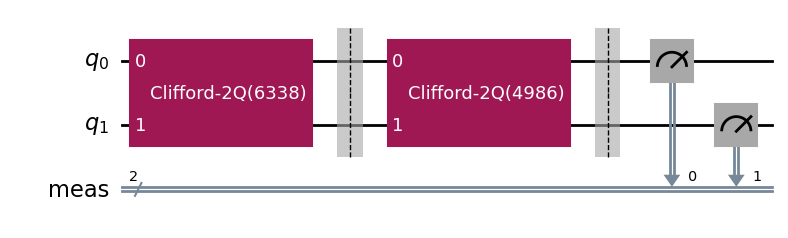

In [11]:
parallel_exp.component_experiment(1).circuits()[0].draw(output="mpl", style="iqp")

In [12]:
parallel_exp.component_experiment(0).analysis.set_options(plot = True)

# This should print out what we set because it's the same option
print(parallel_exp.analysis.component_analysis(0).options.get("plot"))

True


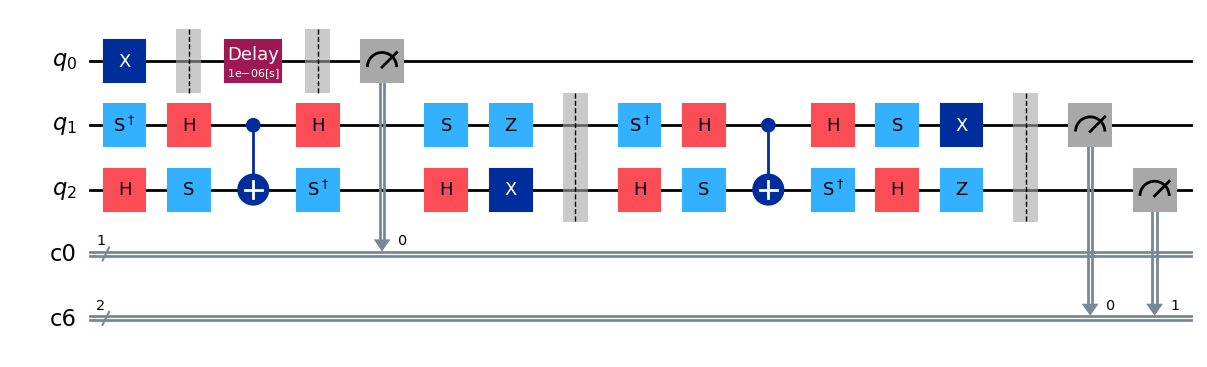

In [13]:
parallel_exp.circuits()[0].draw(output="mpl", style="iqp")

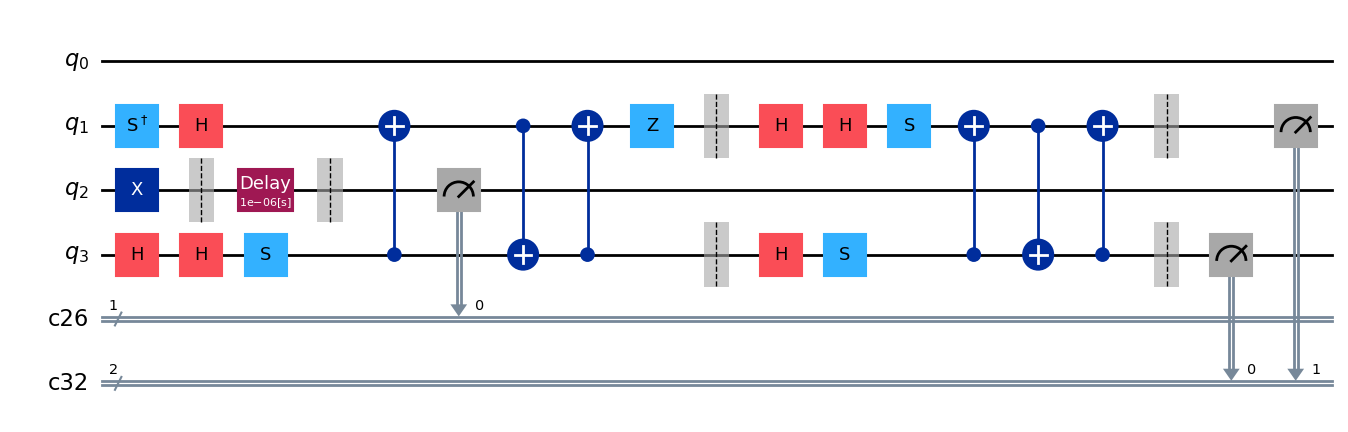

In [14]:
parallel_exp._transpiled_circuits()[0].draw(output="mpl", style="iqp")

# Exercise 2

In [15]:
import numpy as np
from qiskit_experiments.library import StandardRB, InterleavedRB
from qiskit_experiments.framework import ParallelExperiment, BatchExperiment
import qiskit.circuit.library as circuits

# For simulation
from qiskit_aer import AerSimulator
from qiskit_ibm_runtime.fake_provider import FakePerth

backend = AerSimulator.from_backend(FakePerth())

/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


Gate error ratio: {'x': 1.0, 'rz': 0.0, 'sx': 1.0}


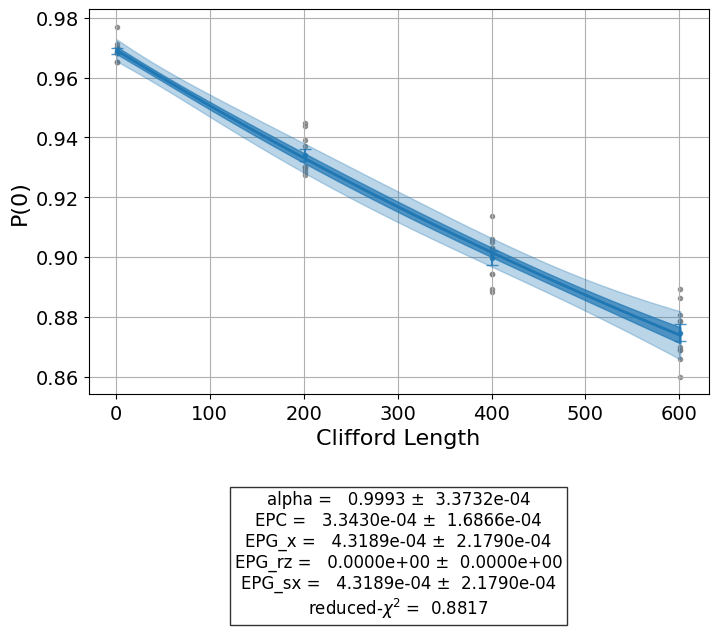

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 92
 - degree of freedom: 1
 - chi-square: 0.8816518863382433
 - reduced chi-square: 0.8816518863382433
 - Akaike info crit.: -0.0490093947834529
 - Bayesian info crit.: -1.8901263114237814
 - init params:
  * a = 0.4691511961412185
  * alpha = 0.9996257360386904
  * b = 0.5
 - fit params:
  * a = 0.28856084510480573 ± 0.12256143626649275
  * alpha = 0.9993314098560482 ± 0.00033732330362013673
  * b = 0.6807330833854704 ± 0.12291340641200643
 - correlations:
  * (a, b) = -0.9999529611519028
  * (alpha, b) = -0.9983149619254728
  * (a, alpha) = 0.9979638067874922
- quality: good
- extra: <2 items>
- device_components: ['Q0']
- verified: False
AnalysisResult
- name: alpha
- value: 0.99933+/-0.00034
- χ²: 0.8816518863382433
- quality: good
- extra: <2 items>
- device_components

In [16]:
lengths = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = [0]

# Run an RB experiment on qubit 0
exp1 = StandardRB(qubits, lengths, num_samples=num_samples, seed=seed)
expdata1 = exp1.run(backend).block_for_results()
results1 = expdata1.analysis_results()

# View result data
print("Gate error ratio: %s" % expdata1.experiment.analysis.options.gate_error_ratio)
display(expdata1.figure(0))
for result in results1:
    print(result)

/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")
/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


Gate error ratio: {'cx': 1.0}


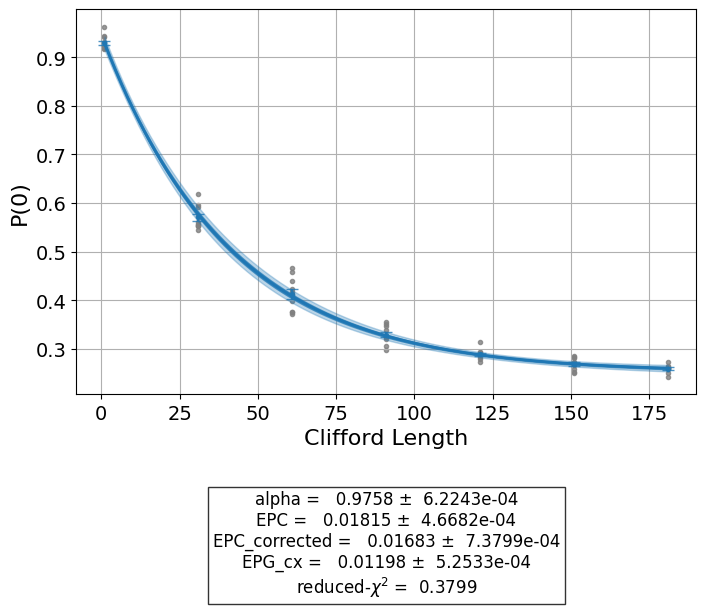

AnalysisResult
- name: @Parameters_RBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 1
  * F_rb_decay(x) = a * alpha ** x + b
 - success: True
 - number of function evals: 20
 - degree of freedom: 4
 - chi-square: 1.5197484518430857
 - reduced chi-square: 0.37993711296077143
 - Akaike info crit.: -4.691557240706798
 - Bayesian info crit.: -4.8538267935408586
 - init params:
  * a = 0.6967183628613908
  * alpha = 0.976214174505297
  * b = 0.25
 - fit params:
  * a = 0.6946985645917645 ± 0.005108817562147585
  * alpha = 0.97579791338541 ± 0.0006224279057544897
  * b = 0.2515453720311406 ± 0.0028867941838096618
 - correlations:
  * (alpha, b) = -0.7685227052704017
  * (a, b) = -0.40300828896212465
  * (a, alpha) = 0.11706377979584427
- quality: good
- extra: <2 items>
- device_components: ['Q1', 'Q2']
- verified: False
AnalysisResult
- name: alpha
- value: 0.9758+/-0.0006
- χ²: 0.37993711296077143
- quality: good
- extra: <2 items>
- device_comp

In [17]:
lengths_2_qubit = np.arange(1, 200, 30)
lengths_1_qubit = np.arange(1, 800, 200)
num_samples = 10
seed = 1010
qubits = (1, 2)

# Run a 1-qubit RB experiment on qubits 1, 2 to determine the error-per-gate of 1-qubit gates
single_exps = BatchExperiment(
    [
        StandardRB((qubit,), lengths_1_qubit, num_samples=num_samples, seed=seed)
        for qubit in qubits
    ]
)
expdata_1q = single_exps.run(backend).block_for_results()

# Run an RB experiment on qubits 1, 2
exp_2q = StandardRB(qubits, lengths_2_qubit, num_samples=num_samples, seed=seed)

# Use the EPG data of the 1-qubit runs to ensure correct 2-qubit EPG computation
exp_2q.analysis.set_options(epg_1_qubit=expdata_1q.analysis_results())

# Run the 2-qubit experiment
expdata_2q = exp_2q.run(backend).block_for_results()

# View result data
print("Gate error ratio: %s" % expdata_2q.experiment.analysis.options.gate_error_ratio)
display(expdata_2q.figure(0))
for result in expdata_2q.analysis_results():
    print(result)

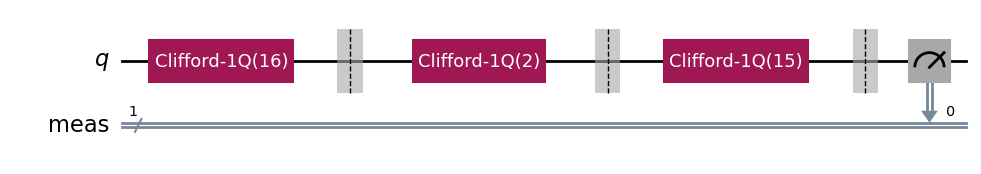

In [18]:
# Run an RB experiment on qubit 0
exp = StandardRB(physical_qubits=(0,), lengths=[2], num_samples=1, seed=seed)
c = exp.circuits()[0]
c.draw(output="mpl", style="iqp")

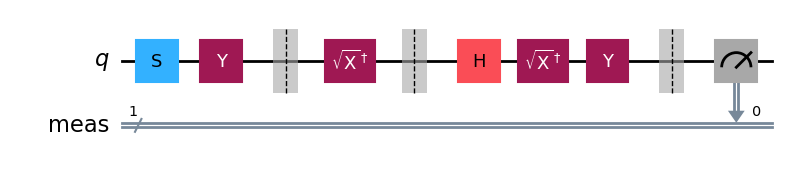

In [19]:
c.decompose().draw(output="mpl", style="iqp")

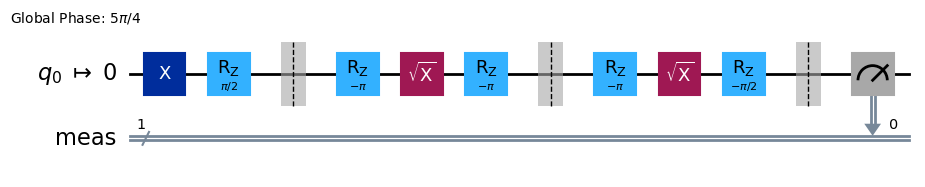

In [20]:
from qiskit import transpile
transpile(c, backend, **vars(exp.transpile_options)).draw(output="mpl", style="iqp", idle_wires=False)

/Users/jiakaiwang/Documents/GitHub/physics707/.venv/lib/python3.13/site-packages/qiskit_ibm_runtime/fake_provider/local_service.py:233: UserWarning: Options {'execution': {'meas_type': 'classified'}} have no effect in local testing mode.
  warnings.warn(f"Options {options_copy} have no effect in local testing mode.")


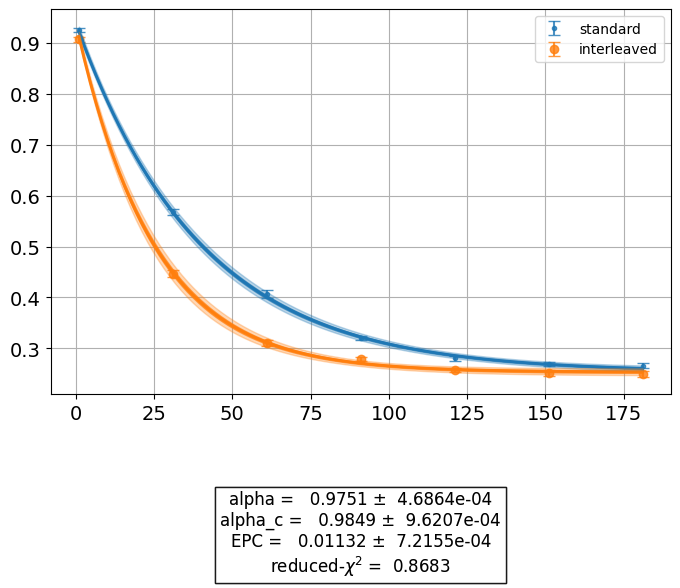

AnalysisResult
- name: @Parameters_InterleavedRBAnalysis
- value: CurveFitResult:
 - fitting method: least_squares
 - number of sub-models: 2
  * F_standard(x) = a * alpha ** x + b
  * F_interleaved(x) = a * (alpha_c * alpha) ** x + b
 - success: True
 - number of function evals: 30
 - degree of freedom: 10
 - chi-square: 8.683314320504282
 - reduced chi-square: 0.8683314320504282
 - Akaike info crit.: 1.3128434447091593
 - Bayesian info crit.: 3.869072763170193
 - init params:
  * a = 0.6869585297644231
  * alpha = 0.9795370775711042
  * b = 0.25
  * alpha_c = 0.9802940904498436
 - fit params:
  * a = 0.6858240237601426 ± 0.003840242729707478
  * alpha = 0.9750979010901965 ± 0.00046864017989420255
  * b = 0.2536070326573754 ± 0.002246274712100047
  * alpha_c = 0.9849117036922148 ± 0.0009620666327552528
 - correlations:
  * (alpha, b) = -0.6184917165833411
  * (a, b) = -0.46641578018407936
  * (b, alpha_c) = -0.2565059326582314
  * (alpha, alpha_c) = -0.102210242993516
  * (a, alpha_c)

In [21]:
lengths = np.arange(1, 200, 30)
num_samples = 10
seed = 1010
qubits = (1, 2)

# The interleaved gate is the CX gate
int_exp2 = InterleavedRB(
    circuits.CXGate(), qubits, lengths, num_samples=num_samples, seed=seed)

int_expdata2 = int_exp2.run(backend).block_for_results()
int_results2 = int_expdata2.analysis_results()
# View result data
display(int_expdata2.figure(0))
for result in int_results2:
    print(result)

# Number of samples to generate for each sequence length
# Seed because it's computer simulation
# 2-qubit gate is more error prone / is longer
# The interleaved has more error becuase it's more gates, the two-qubit gate error is associated with the difference in those two exponential decay rates

# Exercise 3